# Interactive Data Visualization



### Interaction Examples:
* "picking", select, link, filter, re-order, navigate, change axes, ...
* Gapminder: https://www.gapminder.org/tools/
* Hedonometer: http://hedonometer.org/index.html
* The dude map: https://qz.com/316906/the-dude-map-how-american-men-refer-to-their-bros/
* "Dynamic query" Homefinder: https://www.youtube.com/watch?v=5X8XY9430fM 

### Events:
* "Picking" example
* Respond to interaction events in plots or widgets
* Callback functions:
    1. Create plot and/or widget
    2. Define the callback function
    3. Register the callback function for an event in the plot or widget
* Matplotlib events: https://matplotlib.org/users/event_handling.html

### Widgets:
* Jupyter ipywidgets: http://ipywidgets.readthedocs.io/en/latest/index.html
    * Widget list: https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html
* Matplotlib widgets: https://matplotlib.org/api/widgets_api.html

### Other Libraries:
* Altair: https://altair-viz.github.io/index.html  (Vega)
* Bokeh: https://docs.bokeh.org/en/latest/  (BokehJS)
* Seaborn: https://seaborn.pydata.org  (Matplotlib)
* Plotly: https://plot.ly/python/  (Plotly.js)
* gleam & ggplot: https://github.com/dgrtwo/gleam http://yhat.github.io/ggpy/ (R Shiny ggplot)
* D3:  see Javascript-D3-in-Python-Notebook.ipynb

## Matplotlib Events

| Event Name | Class and Description |
| --- | --- |
| 'button_press_event' | MouseEvent - mouse button is pressed  |
| 'button_release_event' | MouseEvent - mouse button is released |
| 'draw_event' | DrawEvent - canvas draw (but before screen update) |
| 'key_press_event' | KeyEvent - key is pressed |
| 'key_release_event' | KeyEvent - key is released |
| 'motion_notify_event' | MouseEvent - mouse motion |
| 'pick_event' | PickEvent - an object in the canvas is selected |
| 'resize_event' | ResizeEvent - figure canvas is resized |
| 'scroll_event' | MouseEvent - mouse scroll wheel is rolled |
| 'figure_enter_event' | LocationEvent - mouse enters a new figure |
| 'figure_leave_event' | LocationEvent - mouse leaves a figure |
| 'axes_enter_event' | LocationEvent - mouse enters a new axes |
| 'axes_leave_event' | LocationEvent - mouse leaves an axes |

## Picking in a Scatterplot

In [1]:
import pandas as pd
data = pd.read_csv('VT_tweets_2019_geo.csv')
data = data.copy()[data.longitude!=0].sort_values('datetime')
data

,tweet,username,datetime,latitude,longitude,id
379,All registered for #VTReunion19. It is going t...,hokiebeccaCFS,2019-02-12 14:19:55,37.226027,-80.419250,1095326638168956928
389,You wish you were this cute 💁🏻‍♀️ 📷: dexter_th...,HokiePets,2019-02-12 14:21:50,37.226027,-80.419250,1095327121839292422
468,Ada yang minat untuk menginap di rumah ini? #f...,28fikri10,2019-02-12 14:51:24,37.226027,-80.419250,1095334563549634561
471,TONIGHT ✨ Black Feminism Speaker Series kicks ...,womenscentervt,2019-02-12 14:52:28,37.226027,-80.419250,1095334828604481537
524,We're hiring! Click to apply: Finance Assistan...,tmj_roa_finance,2019-02-12 15:15:50,37.214114,-80.392664,1095340712399228928
...,...,...,...,...,...,...
80739,This job is now open at Cameron Craig Group in...,tmj_roa_jobs,2019-03-21 20:14:24,37.230000,-80.410000,1108824198086975488
80800,#VATech home of The Marching Virginians. #Marc...,johnpneedham,2019-03-21 20:34:34,37.226027,-80.419250,1108829273366773760
80805,"#MarchingVirginians @ Blacksburg, Virginia htt...",johnpneedham,2019-03-21 20:35:55,37.226290,-80.410620,1108829615097872386
81404,@hokieswbb playing Furman in the 1st round of ...,VT_assistWGOLF,2019-03-21 23:36:49,37.222600,-80.419119,1108875138328612869


In [2]:
import matplotlib
%matplotlib notebook

<IPython.core.display.Javascript object>


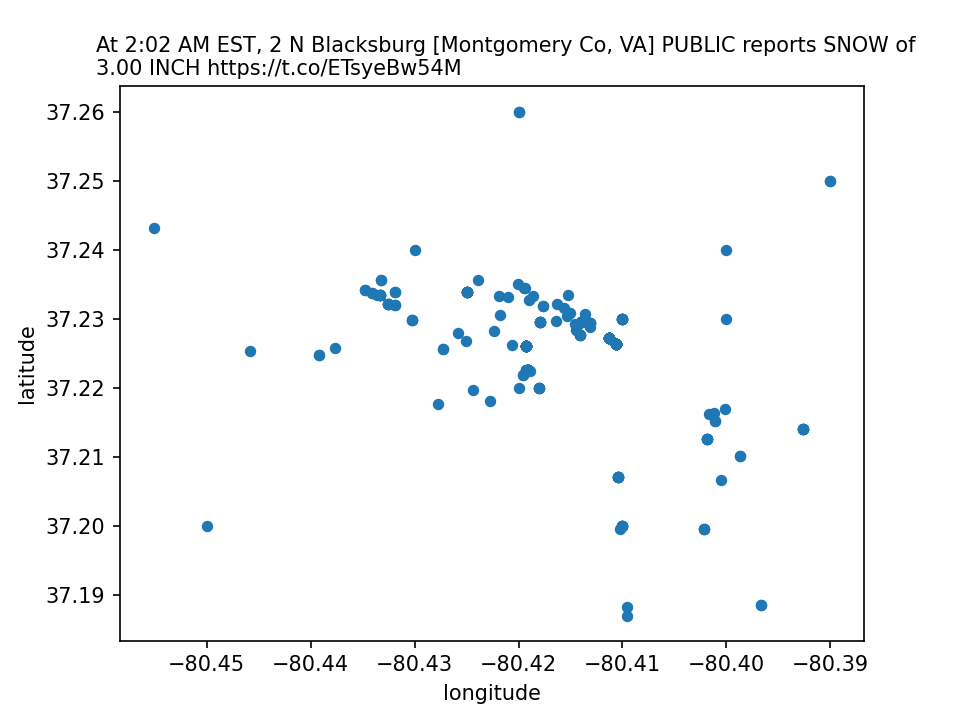

9

In [9]:
ax = data.plot.scatter(x='longitude', y='latitude', picker=True)
text = ax.figure.text(0.1, 0.9, 'hello world', wrap=True)

#class back function
def pick(event):
    text.set_text(data.tweet.iloc[event.ind[0]])
    
# register
ax.figure.canvas.mpl_connect('pick_event', pick)

## Widgets
Jupyter Widgets

In [4]:
import ipywidgets

w = ipywidgets.IntRangeSlider(min=0, max=100, value=(0,100))
display(w)

def sliderChange(event):
    print(event.new)

w.observe(sliderChange, names='value')


IntRangeSlider(value=(0, 100))

### Dynamic Query example

<IPython.core.display.Javascript object>


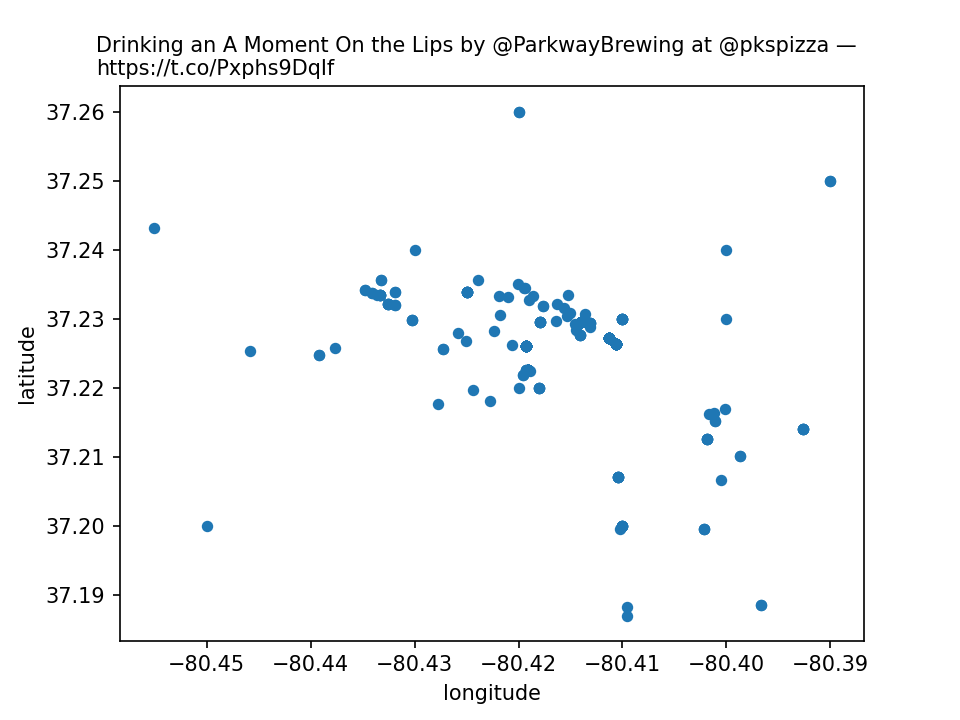

IntRangeSlider(value=(0, 416), max=416)

In [5]:
ax2 = data.plot.scatter(x='longitude', y='latitude', picker=True)
text = ax2.figure.text(0.1, 0.9, 'hello world', wrap=True)

#class back function
def pick(event):
    text.set_text(data.tweet.iloc[event.ind[0]])
    
# register
ax2.figure.canvas.mpl_connect('pick_event', pick)



w2 = ipywidgets.IntRangeSlider(min=0, max=416, value=(0,416))
display(w2)

def sliderChange2(event):
    ax2.clear()
    data.iloc[event.new[0]:event.new[1]+1,:].plot.scatter(x='longitude', y='latitude', picker=True, ax=ax2)
    
w2.observe(sliderChange2, names='value')


### LineBuilder Example

<IPython.core.display.Javascript object>


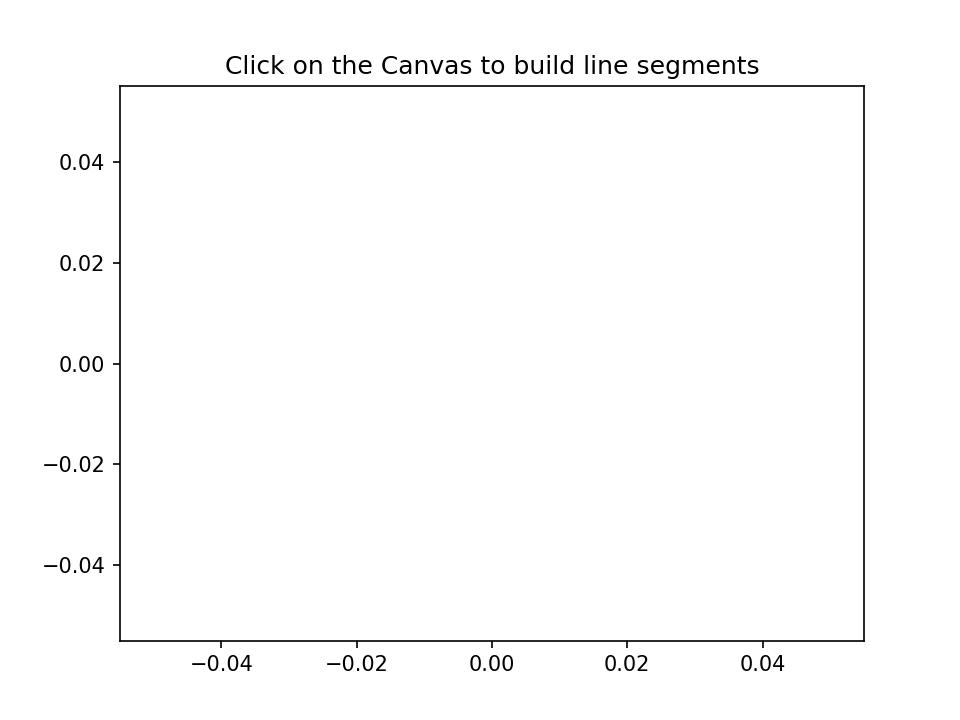

In [6]:
import matplotlib.pyplot as plt

class LineBuilder:
    def __init__(self, line):
        self.line = line
        self.xs = list(line.get_xdata())
        self.ys = list(line.get_ydata())
        self.cid = line.figure.canvas.mpl_connect('button_press_event', self)
        
    def __call__(self, event):
        self.xs.append(event.xdata)
        self.ys.append(event.ydata)
        self.line.set_data(self.xs, self.ys)
        self.line.figure.canvas.draw()


fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title("Click on the Canvas to build line segments")
(line,) = ax.plot([0],[0]) #empty line

linebuilder = LineBuilder(line)

### Draggable Rectangle Example

<IPython.core.display.Javascript object>


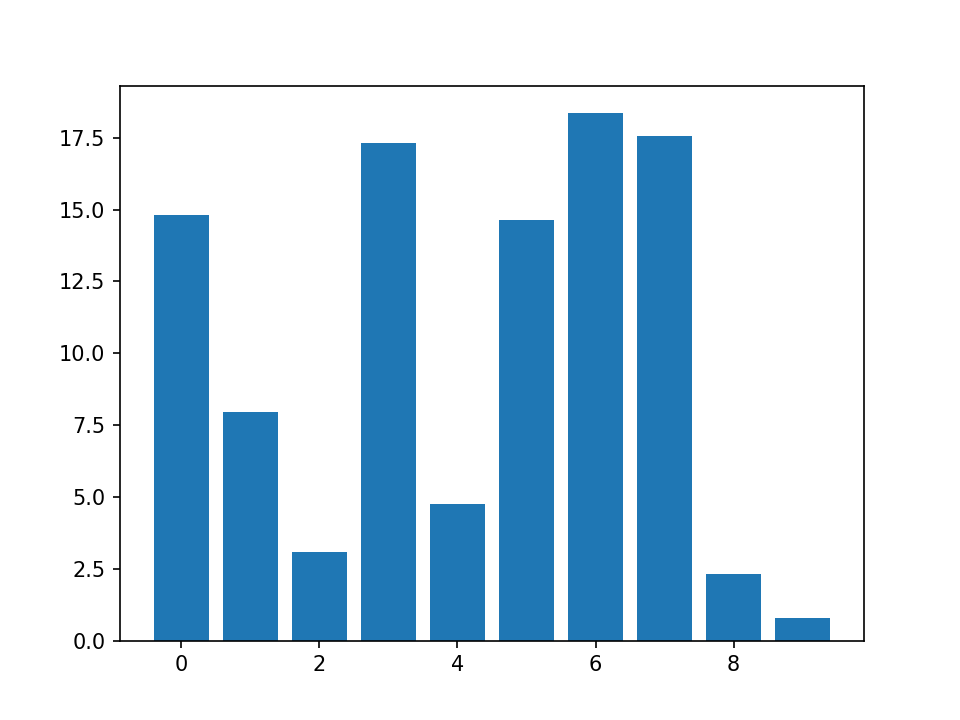

In [7]:
import numpy as np
import matplotlib.pyplot as plt

class DraggableRectangle:
    def __init__(self, rect):
        self.rect = rect
        self.press = None

    def connect(self):
        #connect to all the events we need
        self.cidpress = self.rect.figure.canvas.mpl_connect(
            'button_press_event', self.on_press)
        self.cidrelease = self.rect.figure.canvas.mpl_connect(
            'button_release_event', self.on_release)
        self.cidmotion = self.rect.figure.canvas.mpl_connect(
            'motion_notify_event', self.on_motion)

    def on_press(self, event):
        #on button press we will see if the mouse is over us and store some data
        if event.inaxes != self.rect.axes: return

        contains, attrd = self.rect.contains(event)
        if not contains: return
        print('event contains', self.rect.xy)
        x0, y0 = self.rect.xy
        self.press = x0, y0, event.xdata, event.ydata

    def on_motion(self, event):
        #on motion we will move the rect if the mouse is over us
        if self.press is None: return
        if event.inaxes != self.rect.axes: return
        x0, y0, xpress, ypress = self.press
        dx = event.xdata - xpress
        dy = event.ydata - ypress
        self.rect.set_x(x0+dx)
        self.rect.set_y(y0+dy)
        self.rect.figure.canvas.draw()


    def on_release(self, event):
        #on release we reset the press data
        self.press = None
        self.rect.figure.canvas.draw()

    def disconnect(self):
        #disconnect all the stored connection ids
        self.rect.figure.canvas.mpl_disconnect(self.cidpress)
        self.rect.figure.canvas.mpl_disconnect(self.cidrelease)
        self.rect.figure.canvas.mpl_disconnect(self.cidmotion)

fig = plt.figure()
ax = fig.add_subplot(111)
rects = ax.bar(range(10), 20*np.random.rand(10))
drs = []
for rect in rects:
    dr = DraggableRectangle(rect)
    dr.connect()
    drs.append(dr)

plt.show()